In [93]:
import numpy as np
import matplotlib.pyplot as plt
import dismech
import helper

np.concat = np.concatenate
np.bool = np.bool_

geom = dismech.GeomParams(rod_r0=0,
                          shell_h=1e-3)

material = dismech.Material(density=1200,
                            youngs_rod=0,
                            youngs_shell=2e6,
                            poisson_rod=0,
                            poisson_shell=0.5)

static_3d_sim = dismech.SimParams(static_sim=True,
                                  two_d_sim=False,
                                  use_mid_edge=False,
                                  use_line_search=False,
                                  show_floor=False,
                                  log_data=True,
                                  log_step=1,
                                  dt=1e-1,
                                  max_iter=25,
                                  total_time=1,
                                  plot_step=10,
                                  tol=1e-4,
                                  ftol=1e-4,
                                  dtol=1e-2)

geo = dismech.Geometry.from_txt('mesh_python_example1.txt')

# Create a robot instance (w/o gravity)
base_robot = dismech.SoftRobot(geom, material, geo, static_3d_sim, dismech.Environment())
n_to_e = helper.get_node_to_edge_id(base_robot)

In [94]:
# Stretch Springs and Hinge Springs are now contiguous np arrays
print(base_robot.stretch_springs.EA)

# If you want element wise interaction, select views (cannot advanced index!)
print(base_robot.stretch_springs.get_view(6).EA)

# Also iterable
average_EA = 0.0
for s in base_robot.stretch_springs:
    average_EA += s.EA
print(average_EA / len(base_robot.stretch_springs))

[173.20577019 173.20577019 173.20508076 173.20427019 173.20427019
 173.20427019 149.99906404  86.60254038 150.00079609 173.20577019
 173.20508076 173.20577019 173.20577019 173.20508076 173.20577019
 173.20508076 173.20427019 173.20508076 173.20427019 173.20427019
 173.20577019 173.20427019 173.20508076 173.20577019 173.20508076
 173.20577019 173.20508076 150.00079609 173.20577019  86.60254038
 173.20427019 149.99906404 173.20508076 173.20427019 173.20427019
 173.20508076 173.20508076 173.20508076 173.20577019 173.20508076
 173.20577019 173.20427019 173.20427019 173.20508076 173.20508076
 173.20427019 173.20427019 173.20508076 173.20577019 173.20577019
 173.20508076 173.20427019 173.20577019 173.20508076 173.20577019
 173.20427019 150.00079609  86.60254038 149.99906404 149.99906404
  86.60254038 150.00079609]
149.9990640370799
164.62357583403482


In [95]:
# Nat strain starts as nan
# If you set a nat_strain value to something other than nan, it will not get replaced
test_robot = dismech.SoftRobot(geom, material, geo, static_3d_sim, dismech.Environment())

test_robot.stretch_springs.nat_strain[1] = 3
print(test_robot.stretch_springs.nat_strain)

# When you create an energy object, the natural strain is set
se = dismech.StretchEnergy(test_robot.stretch_springs, test_robot.state)
print(test_robot.stretch_springs.nat_strain)

[nan  3. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
[-1.11022302e-16  3.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00 -1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.11022302e-16 -1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.11022302e-16
 -1.11022302e-16  0.00000000e+00  0.00000000e+00 -1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00

In [96]:
# Example thresholding
x_thresh = 0.3
y_thresh = 0.3
thresh_strain = 0.2
temp = []
for s in base_robot.stretch_springs:
    n1, n2 = base_robot.q0[base_robot.map_node_to_dof(s.nodes_ind)]
    if (n1[0] + n2[0]) / 2 > x_thresh:
        s.nat_strain = thresh_strain
    #elif (n1[1] + n2[1]) / 2 > y_thresh:
    #    s.nat_strain = thresh_strain
    if (s.nat_strain == thresh_strain):
        temp.append(int(n_to_e(s.nodes_ind)))
print(temp)

temp=[]
for s in base_robot.hinge_springs:
    n1, n2, _, _ = base_robot.q0[base_robot.map_node_to_dof(s.nodes_ind)]
    if (n1[0] + n2[0]) / 2 > x_thresh:
        s.nat_strain = thresh_strain
    #if (n1[1] + n2[1]) / 2 > y_thresh:
    #    s.nat_strain = thresh_strain
    if (s.nat_strain == thresh_strain):
        temp.append(int(n_to_e(s.nodes_ind[:2])))
print(temp)

[38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 56, 57, 58, 59, 60, 61]
[38, 41, 45, 43, 48, 40, 42, 57, 46, 49, 60]


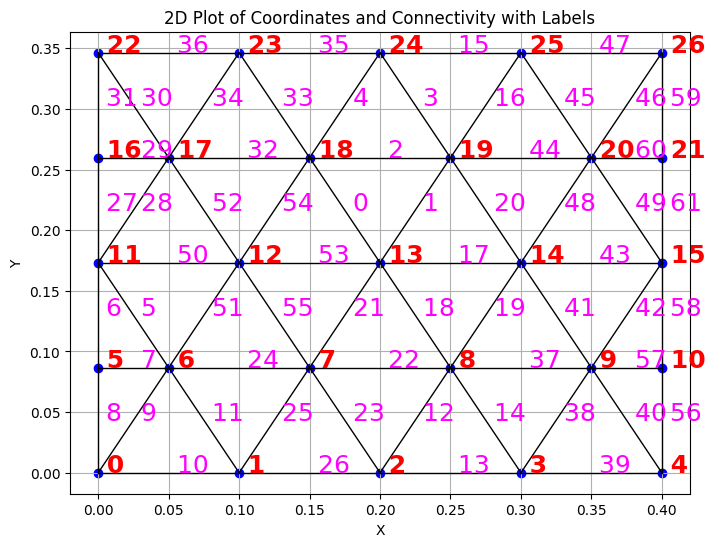

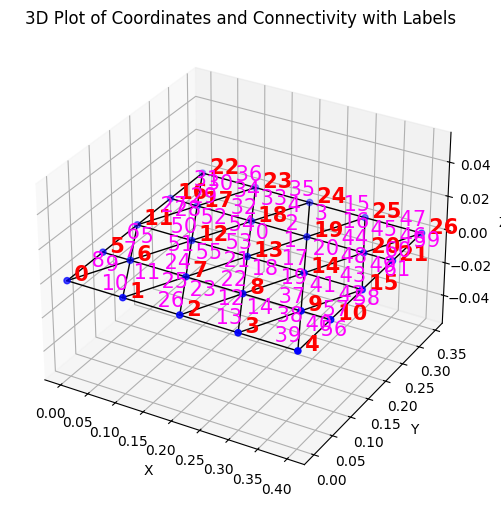

In [97]:
helper.plot_edge_ids(base_robot.q0.reshape(-1, 3), base_robot.edges)

In [98]:
coords = base_robot.q0.reshape((-1, 3))
tol = 1e-5
min_x = np.min(coords[:, 0])
max_x = np.max(coords[:, 0])
left_ids   = np.array(np.where(np.isclose(coords[:, 0], min_x, atol=tol))[0])
right_ids  = np.array(np.where(np.isclose(coords[:, 0], max_x, atol=tol))[0])

base_robot = base_robot.fix_nodes(np.union1d(left_ids, right_ids))

def pull_right_end(robot: dismech.SoftRobot, t: float):
    """ Simple example of a moving boundary condition """
    u0 = 0.01
    robot = robot.move_nodes(right_ids, u0 * robot.sim_params.dt, 0)
    
    return robot

stepper = dismech.ImplicitEulerTimeStepper(base_robot)
stepper.before_step = pull_right_end

robots = stepper.simulate()

In [105]:
qs = np.stack([robot.state.q for robot in robots])
states = [robot.state for robot in robots]
t = np.arange(base_robot.sim_params.total_time, step=base_robot.sim_params.dt)  # (100)
options = dismech.AnimationOptions(z_lim=[-0.1, 0.1],
                                   title='Shell Cantilever (N=40)')
fig = dismech.get_interactive_animation_plotly(base_robot, t, qs, options)
fig.show()

In [100]:
data = []
for s in states:
    temp = {}
    temp[dismech.STRETCH] = helper.get_entry(s, base_robot.stretch_springs, stepper.elastic_energies[dismech.STRETCH], n_to_e)
    temp[dismech.HINGE] = helper.get_entry(s, base_robot.hinge_springs, stepper.elastic_energies[dismech.HINGE], n_to_e)
    data.append(temp)

In [101]:
helper.write_elastic_energy_csv(data, fill_value=1e-10)

Energy Types: ['hinge', 'stretch']
Edge IDs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
